<a href="https://colab.research.google.com/github/msinankhan/News-Analysis/blob/main/News_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The following project is built with an intention to help in the analysis of the coverage of various media outlets.

###We try to count the number of articles a given media has dedicated to a given topic.

###We hypothesize that if the article is about a given subject, that words most likely exists in the title of the article.
###As in the following case, we assume if the article is about covid, the words COVID or COVID-19 or CORONA VIRUS etc would be present in the title


In [ ]:
!pip install newspaper3k

     |████████████████████████████████| 211 kB 5.3 MB/s 
     |████████████████████████████████| 7.4 MB 26.3 MB/s 
     |████████████████████████████████| 81 kB 9.0 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=13553 sha256=089519898e43d05c7ed9fa08afc4816b4998da34b8355b58b1c128605c488e68
  Stored in directory: /root/.cache/pip/wheels/df/67/41/faca10fa501ca010be41b49d40360c2959e1c4f09bcbfa37fa
  Created wheel for feedfinder2: filename=feedfinder2-0.0.4-py3-none-any.whl size=3357 sha256=52549aaff2f4451eafb856f92ef11c4ccac3da176eff8d5ce51e3b4c84f35a11
  Stored in directory: /root/.cache/pip/wheels/7f/d4/8f/6e2ca54744c9d7292d88ddb8d42876bcdab5e6d84a21c10346
  Created wheel for jieba3k: filename=jieba3k-0.35.1-py3-none-any.whl size=7398404 sha256=3e5c8547ff8fd72ba5ca2b1a96630ec3663bf05f90e08b7aec3885f4426de720
  Stored in directory: /root/.cache/pip/wheels/4c/91/46/3c208287b726df325a597957432

#####Importing necessary packages...

In [ ]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
from newspaper import Article
import requests
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
URL=["https://www.timesnownews.com/coronavirus","https://www.indiatoday.in/coronavirus","https://www.ndtv.com/coronavirus?pfrom=home-mainnavgation"]
Url_count = []

The following for loop scrapres all the links that exist within a url from the URL list.

Each of the extracted link's title is then printed

In [ ]:
for url in URL:
    parser = 'html.parser'  
    resp = requests.get(url)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, parser, from_encoding=encoding)
        
    links = []
    for link in soup.find_all('a', href=True):
        if "javascript" in link["href"]:
            continue
        links.append(link['href'])
    count = 0 
    for link in links:
        try:
            article = Article(link)
            article.download()
            article.parse()
            print(article.title)
            if "COVID" in article.title or "coronavirus" in article.title or "Coronavirus"in article.title or "Covid-19" in article.title or "COVID-19" in article.title :
                    count += 1
    
        except:
            pass
    Url_count.append(count)
    print()
    print()
    print()


Login • Instagram
Savlon Swasth India Mission- Hygiene Sahi to Health Sahi, Handwash Campaign
Sports News, Latest Esports News and Articles
Log in to Facebook

LinkedIn
Share on WhatsApp
Entertainment News - Latest Bollywood News, Hollywood, Celebrity News and Gossips
Bollywood News, Latest Hindi Movie News, Bollywood Gossips, Bollywood Videos
Watch all latest movies, tv, news videos online
Entertainment News - Latest Bollywood News, Hollywood, Celebrity News and Gossips
Latest Hollywood News : English Movie News Today, Hollywood Gossips, Celeb Photos, Videos
Latest Celebrity News and Gossips
Latest Television News, TV serials news, TV celeb actors photos
Web series and OTT Original movies News and Updates
Korean - Korean News, Latest Korean Articles
Shah Rukh Khan arrives in separate car with black curtains moments after wife Gauri Khan's entry for Alia, Ranbir's wedding bash, WATCH
Ranbir Kapoor, Alia Bhatt wedding reception: Gauri Khan, Karan Johar, Aditya Roy Kapur and other guest

The following code displays the number of occurances of a given word ("covid") in the title of each news website

In [ ]:
print('\033[1m'+ 'Number of articles with the word "coronavirus" in it' )    
for url, count in zip(URL, Url_count):
       
    print('\033[1m'+ "Site:", url, '\033[1m'+ "Count:", count)
    print()
    print()
print('\033[1m'+'Graphical representation of the word count')

Number of articles with the word "coronavirus" in it
Site: https://www.timesnownews.com/coronavirus Count: 0


Site: https://www.indiatoday.in/coronavirus Count: 12


Site: https://www.ndtv.com/coronavirus?pfrom=home-mainnavgation Count: 22


Graphical representation of the word count


Finally, the following code displays a bar graph showing the comparisions between different websites.

Text(0.5, 0, 'News Websites')

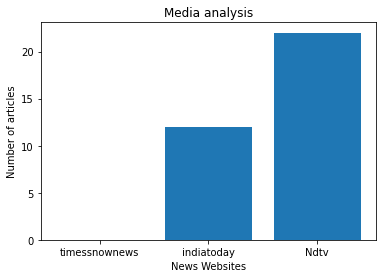

In [ ]:
# make an array for the x-axis from the URL List 
nx = np.arange(len(URL)) 

labels = ['timessnownews', 'indiatoday','Ndtv']

fig = plt.figure()
ax = fig.gca()
ax.set_title('Media analysis')
ax.bar(nx, Url_count)
ax.set_xticks(nx)
ax.set_xticklabels(labels)
ax.set_ylabel('Number of articles')
ax.set_xlabel('News Websites')